<a href="https://colab.research.google.com/github/lamiaakhairyibrahim/ITI_training/blob/main/decision_tree_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 2. Load Dataset
# Dataset link: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [4]:
data = pd.read_csv("../Datasets/heart.csv")
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
print("Dataset Shape:", data.shape, "\n")
data.head()

Dataset Shape: (1025, 14) 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data preprocessing

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(723)

In [9]:
ls = list(data.columns)
ls

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [10]:
data = data.drop_duplicates(ls, keep = 'last')
data.duplicated().sum()

np.int64(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 138 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
X = data.drop("target", axis=1)
y = data["target"]

In [13]:
# 4. Split Data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# 5. Train Decision Tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
# 6. Evaluate Model
y_pred = clf.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 2)*100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 75.0

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


Confusion Matrix:
 [[19  9]
 [ 6 27]]


## Using forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

clff = RandomForestClassifier(criterion="gini", max_depth=5, random_state=42)
clff.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
for i in range (2, 16):

    clff = RandomForestClassifier(criterion="gini", max_depth=i, random_state=42)
    clff.fit(X_train, y_train)

    # 6. Evaluate Model
    y_pred = clff.predict(X_test)

    print(f"Accuracy at depth = {i}:", round(accuracy_score(y_test, y_pred), 2)*100)
    
print('-' *50)

for i in range (2, 16):

    clff = RandomForestClassifier(criterion="entropy", max_depth=i, random_state=42)
    clff.fit(X_train, y_train)

    # 6. Evaluate Model
    y_pred = clff.predict(X_test)

    print(f"Accuracy at depth = {i}:", round(accuracy_score(y_test, y_pred), 2)*100)

Accuracy at depth = 2: 80.0
Accuracy at depth = 3: 82.0
Accuracy at depth = 4: 80.0
Accuracy at depth = 5: 84.0
Accuracy at depth = 6: 82.0
Accuracy at depth = 7: 84.0
Accuracy at depth = 8: 80.0
Accuracy at depth = 9: 84.0
Accuracy at depth = 10: 84.0
Accuracy at depth = 11: 82.0
Accuracy at depth = 12: 82.0
Accuracy at depth = 13: 82.0
Accuracy at depth = 14: 82.0
Accuracy at depth = 15: 82.0
--------------------------------------------------
Accuracy at depth = 2: 79.0
Accuracy at depth = 3: 80.0
Accuracy at depth = 4: 80.0
Accuracy at depth = 5: 84.0
Accuracy at depth = 6: 79.0
Accuracy at depth = 7: 80.0
Accuracy at depth = 8: 82.0
Accuracy at depth = 9: 82.0
Accuracy at depth = 10: 82.0
Accuracy at depth = 11: 82.0
Accuracy at depth = 12: 82.0
Accuracy at depth = 13: 82.0
Accuracy at depth = 14: 82.0
Accuracy at depth = 15: 82.0


## testing more depths

In [18]:
for i in range (5, 16):

    clf = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    # 6. Evaluate Model
    y_pred = clf.predict(X_test)

    print(f"Accuracy at depth = {i}:", round(accuracy_score(y_test, y_pred), 2)*100)
    
print('-' *50)

for i in range (5, 16):

    clf = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=42)
    clf.fit(X_train, y_train)

    # 6. Evaluate Model
    y_pred = clf.predict(X_test)

    print(f"Accuracy at depth = {i}:", round(accuracy_score(y_test, y_pred), 2)*100)

Accuracy at depth = 5: 75.0
Accuracy at depth = 6: 74.0
Accuracy at depth = 7: 80.0
Accuracy at depth = 8: 79.0
Accuracy at depth = 9: 79.0
Accuracy at depth = 10: 79.0
Accuracy at depth = 11: 79.0
Accuracy at depth = 12: 79.0
Accuracy at depth = 13: 79.0
Accuracy at depth = 14: 79.0
Accuracy at depth = 15: 79.0
--------------------------------------------------
Accuracy at depth = 5: 75.0
Accuracy at depth = 6: 77.0
Accuracy at depth = 7: 77.0
Accuracy at depth = 8: 79.0
Accuracy at depth = 9: 79.0
Accuracy at depth = 10: 82.0
Accuracy at depth = 11: 82.0
Accuracy at depth = 12: 82.0
Accuracy at depth = 13: 82.0
Accuracy at depth = 14: 82.0
Accuracy at depth = 15: 82.0


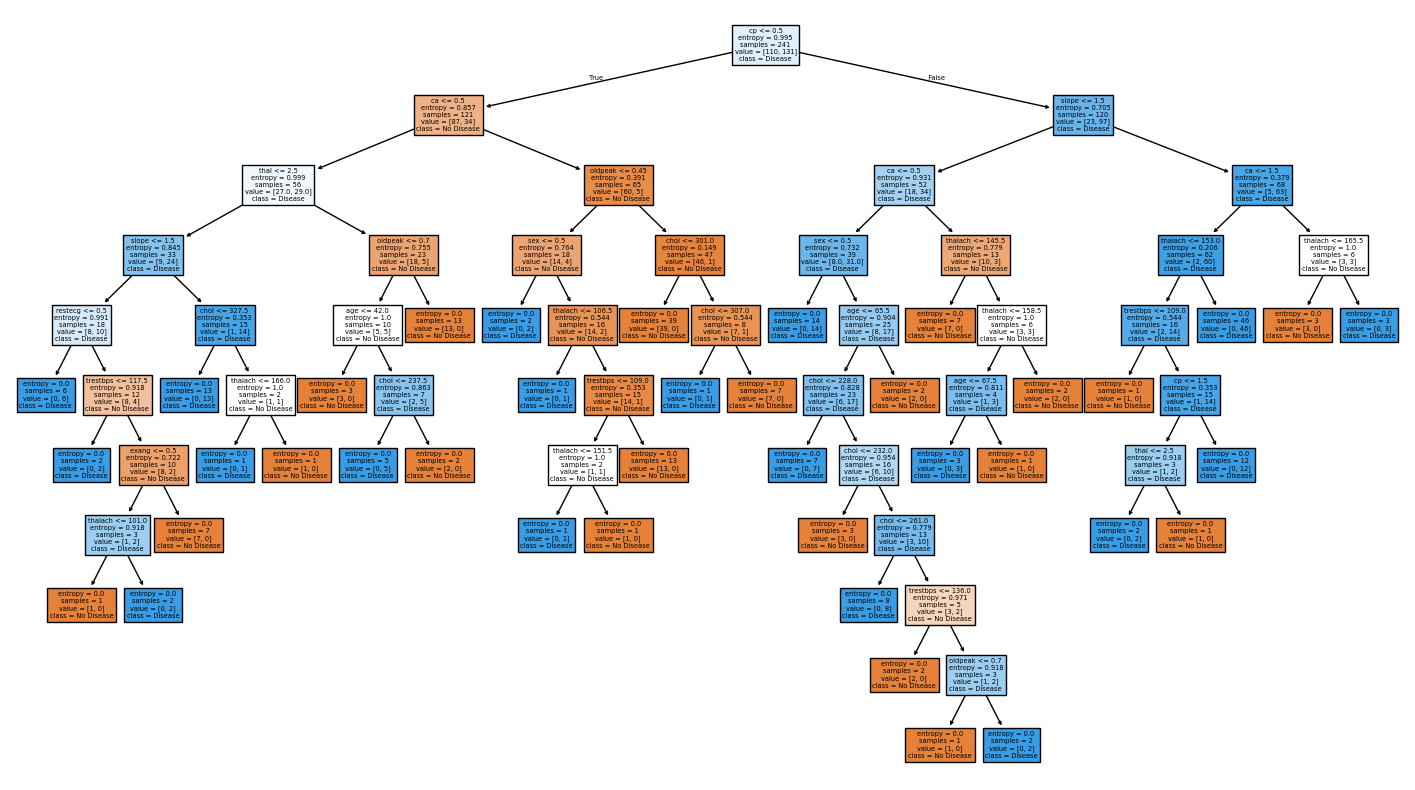

In [19]:

# 7. Visualize Tree
plt.figure(figsize=(18, 10))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()